In [2]:
import os

# Set the working directory
os.chdir('/Users/chennanli/Desktop/Projects/forecasting/TimeSeriesForecasting_Sep2024')

# Set the project root directory
PROJECT_ROOT = os.getcwd()

# Define paths for raw and processed data
RAW_DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'raw')
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed')

# Create the processed data directory if it doesn't exist
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# ... rest of your imports and code ...

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

Summary of CSV Files:
      File Name          Start Time   End Time  Number of Features                                                          Feature Names          DataFrame Shape
    pjmw_hourly 2002-04-01 01:00:00 2018-08-03                   1                                                                PJMW_MW  143206 rows x 1 columns
 pjm_hourly_est 1998-04-01 01:00:00 2018-08-03                  12 AEP, COMED, DAYTON, DEOK, DOM, DUQ, EKPC, FE, NI, PJME, PJMW, PJM_Load 178262 rows x 12 columns
pjm_load_hourly 1998-04-01 01:00:00 2002-01-01                   1                                                            PJM_Load_MW   32896 rows x 1 columns
  dayton_hourly 2004-10-01 01:00:00 2018-08-03                   1                                                              DAYTON_MW  121275 rows x 1 columns
      ni_hourly 2004-05-01 01:00:00 2011-01-01                   1                                                                  NI_MW   58450 rows x 1 columns


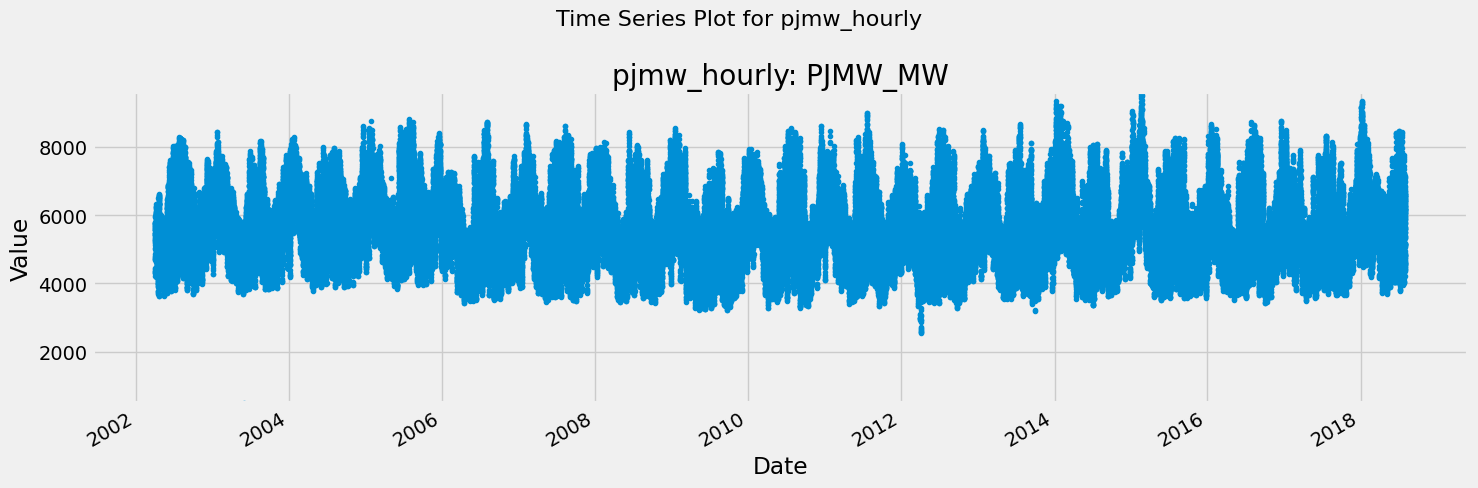

Plotting time series for file: pjm_hourly_est


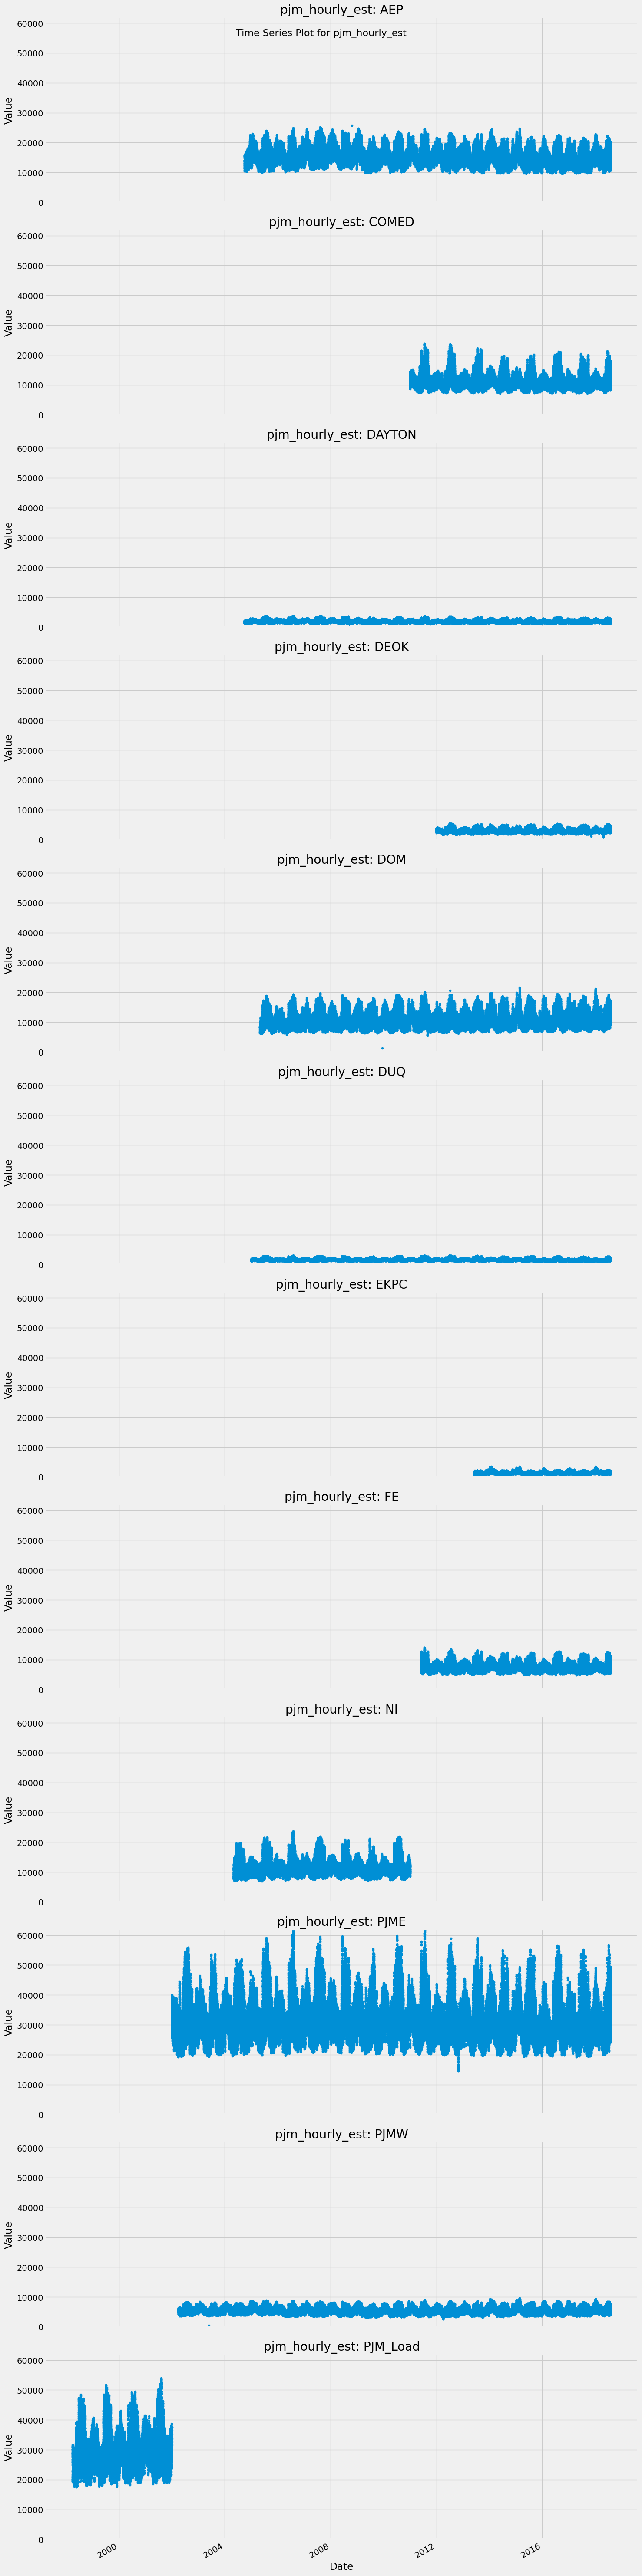

Plotting time series for file: pjm_load_hourly


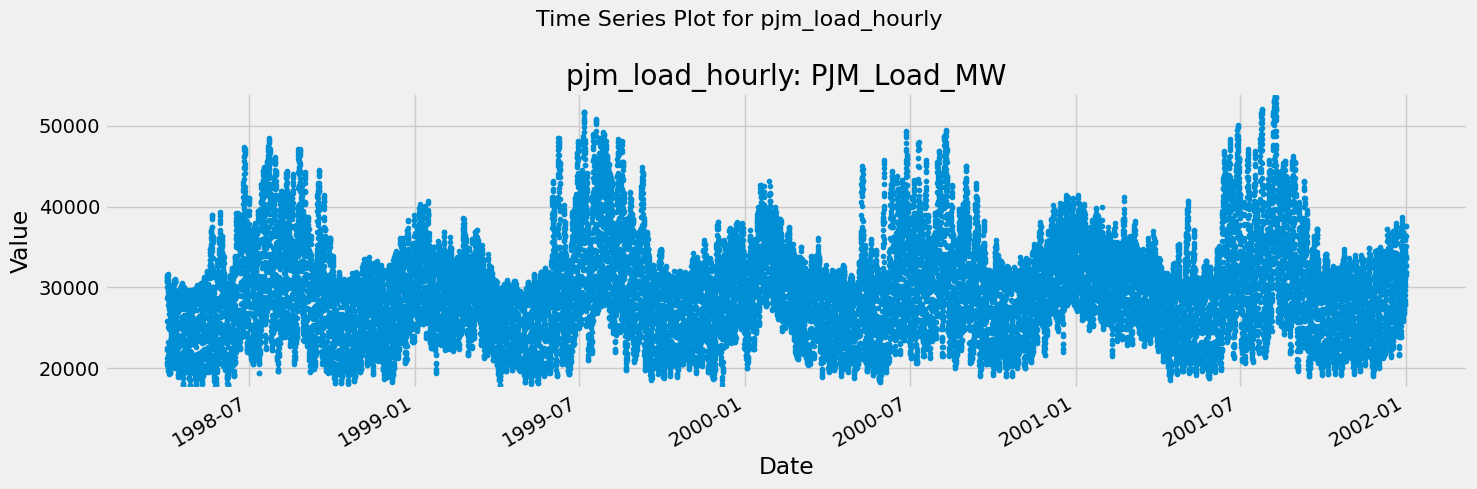

Plotting time series for file: dayton_hourly


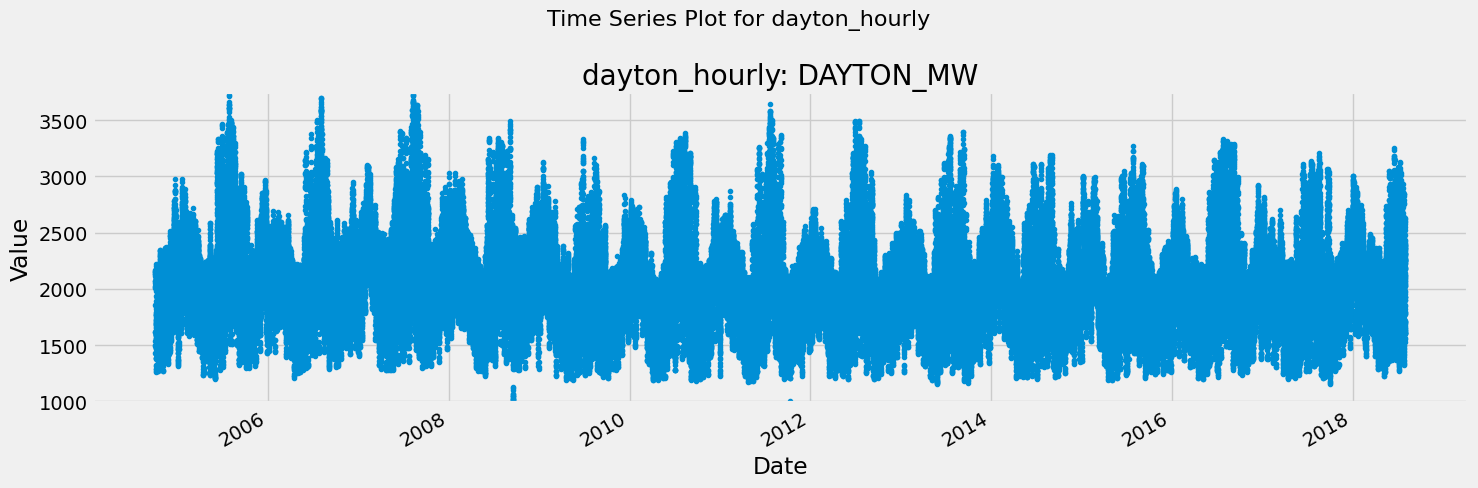

Plotting time series for file: ni_hourly


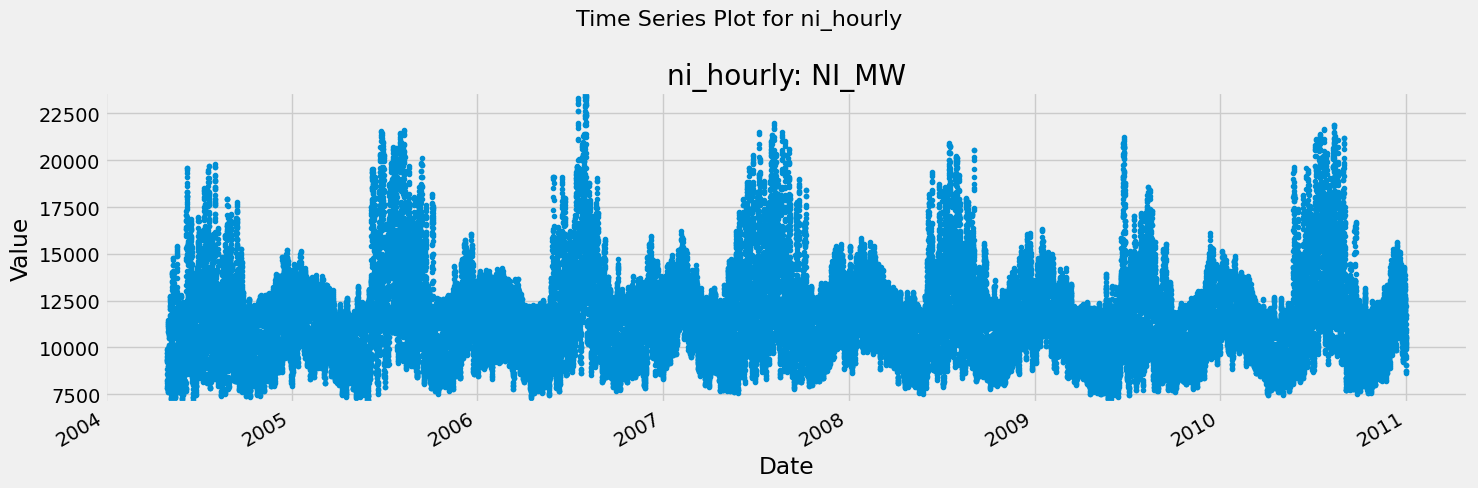

Plotting time series for file: pjme_hourly


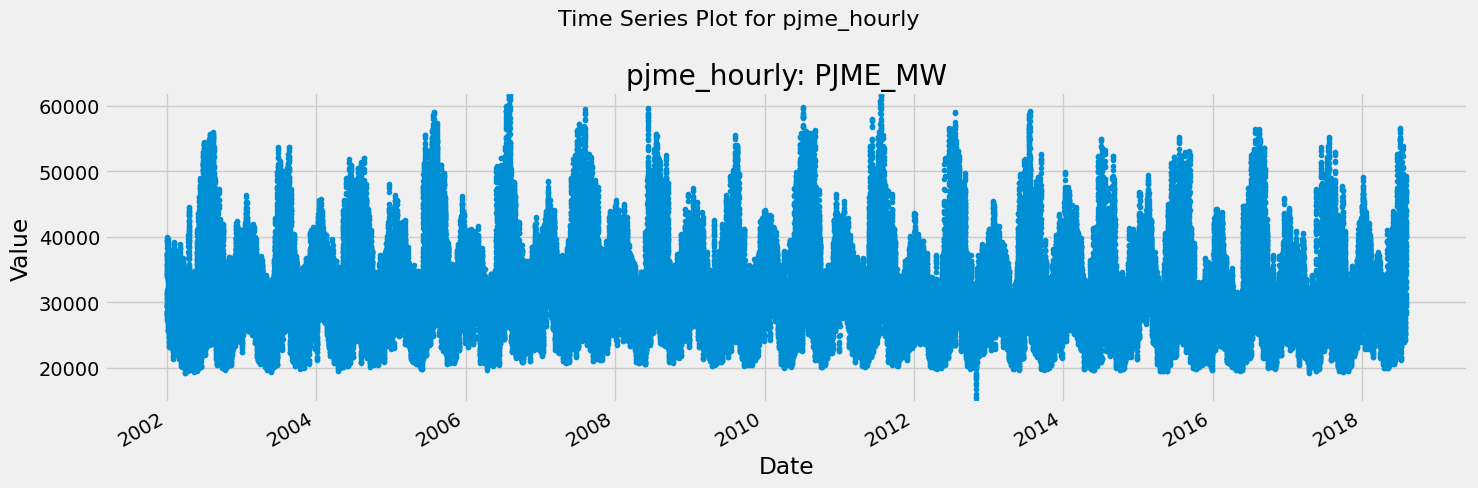

Plotting time series for file: fe_hourly


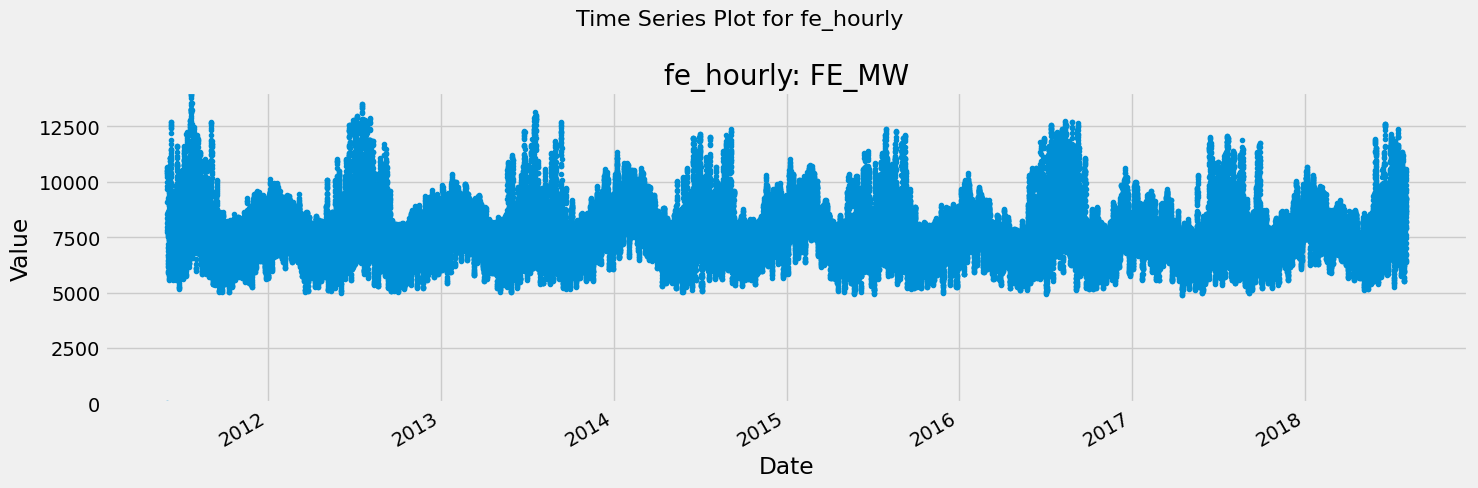

Plotting time series for file: dom_hourly


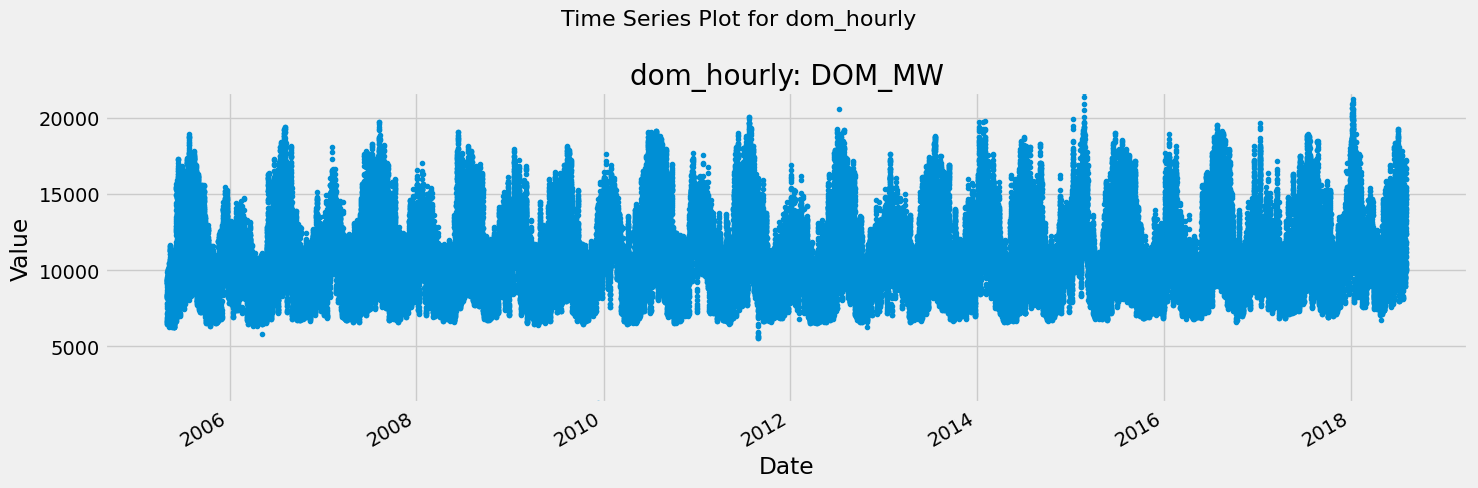

Plotting time series for file: ekpc_hourly


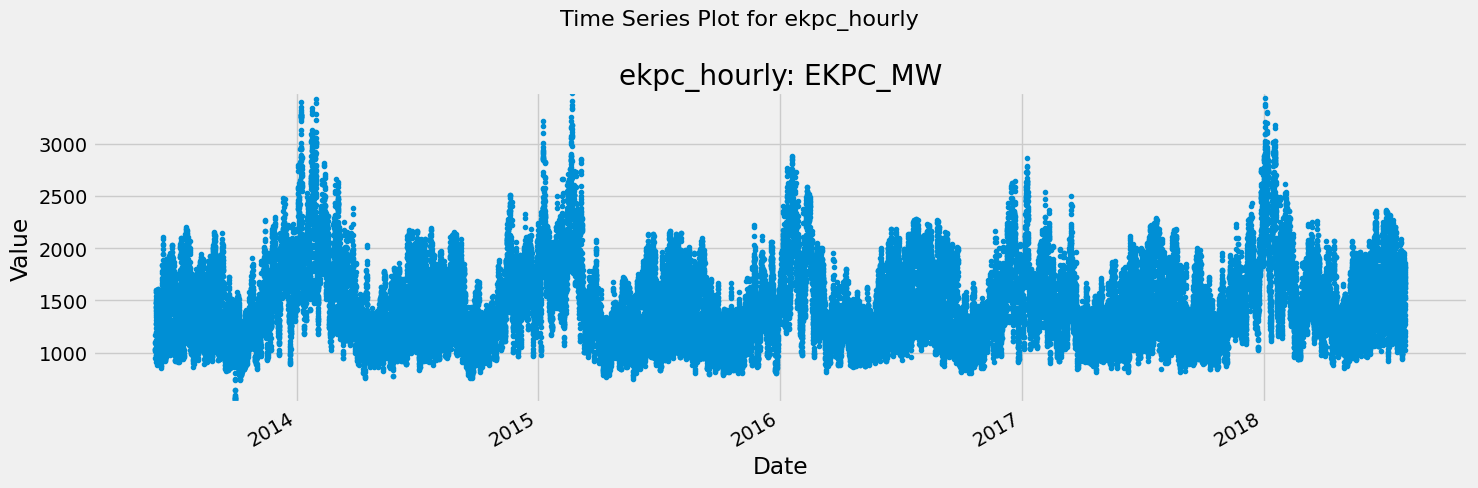

Plotting time series for file: deok_hourly


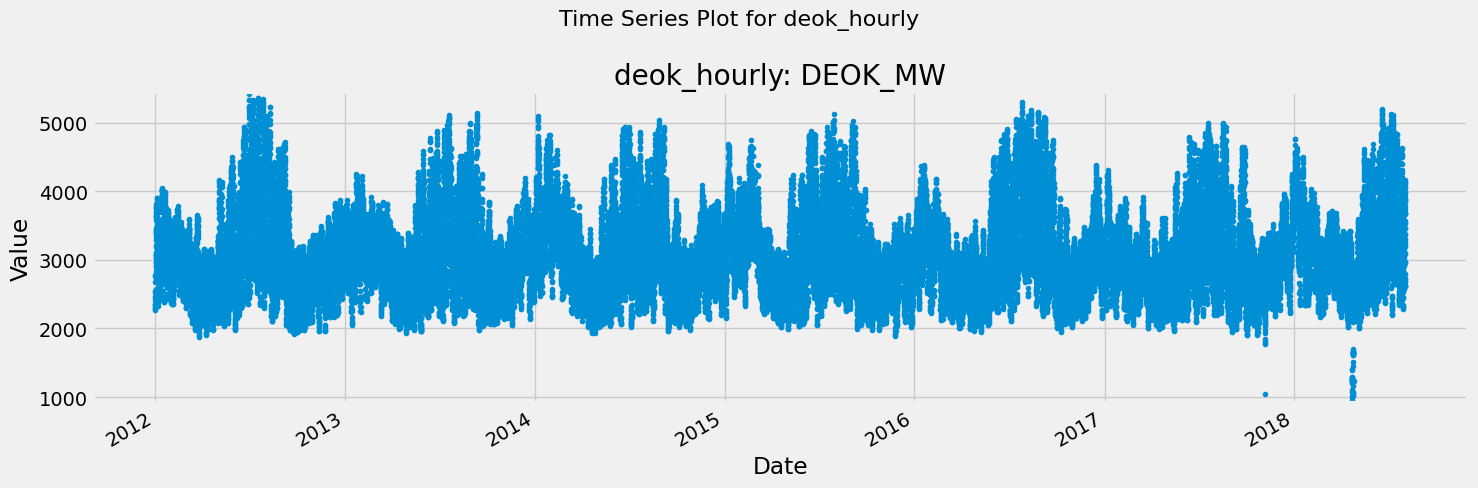

Plotting time series for file: duq_hourly


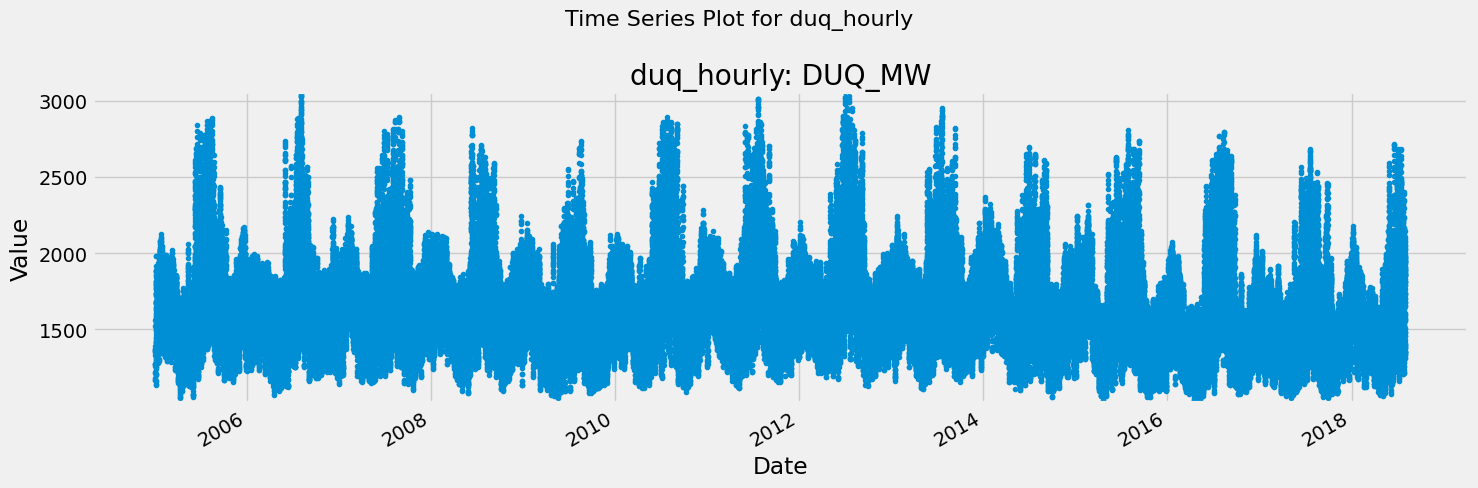

Plotting time series for file: aep_hourly


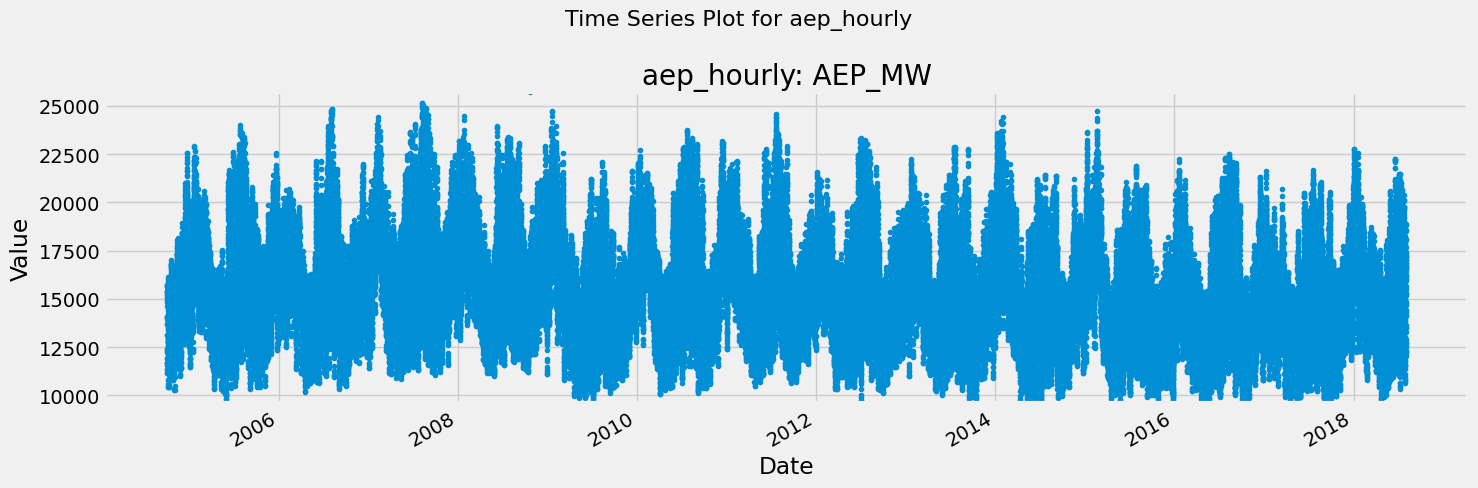

Plotting time series for file: comed_hourly


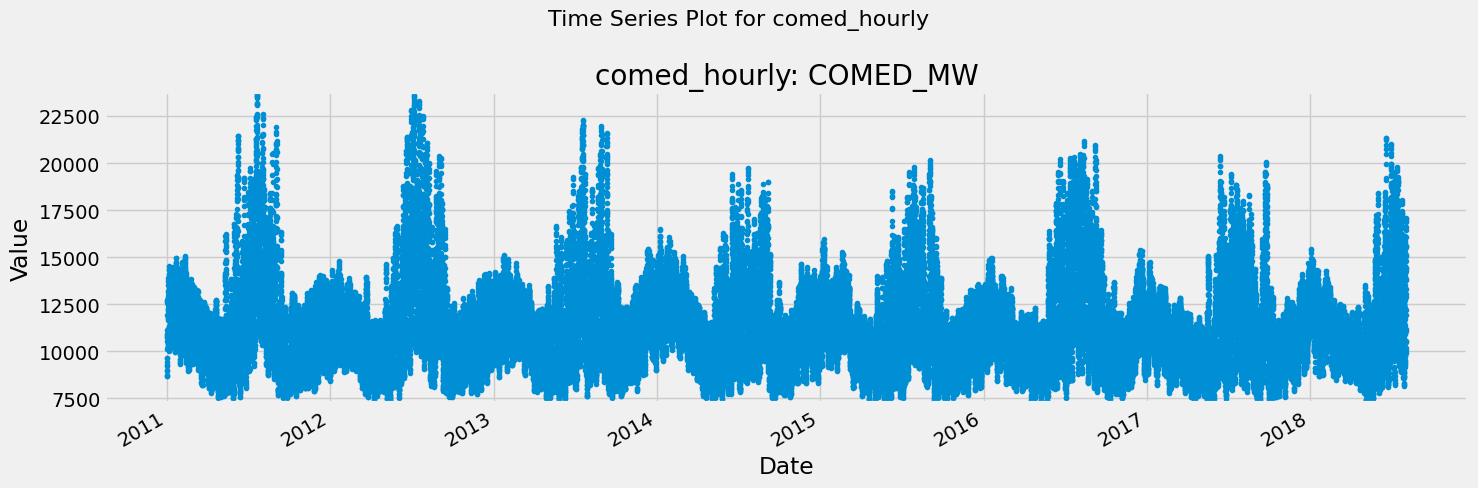

Data loading and visualization complete.


In [13]:
# Get list of all CSV files in the raw data directory
csv_files = [f for f in os.listdir(RAW_DATA_PATH) if f.endswith('.csv')]

# Dictionary to store all dataframes
dfs = {}

# Load each CSV file
for file in csv_files:
    df_name = file.replace('.csv', '').lower()
    dfs[df_name] = pd.read_csv(
        os.path.join(RAW_DATA_PATH, file), 
        index_col=[0], 
        parse_dates=[0]
    )

# Create a summary table
summary_data = []
for name, df in dfs.items():
    summary_data.append({
        'File Name': name,
        'Start Time': df.index.min(),
        'End Time': df.index.max(),
        'Number of Features': len(df.columns),
        'Feature Names': ', '.join(df.columns),
        'DataFrame Shape': f"{df.shape[0]} rows x {df.shape[1]} columns"
    })

summary_df = pd.DataFrame(summary_data)
print("Summary of CSV Files:")
print(summary_df.to_string(index=False))
print("\n")

# Plot time series for each file
for name, df in dfs.items():
    if name == 'hrl_load_metered':
        continue  # Skip hrl_load_metered.csv
    
    # Ensure index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        print(f"Warning: Index for {name} is not datetime. Skipping plot.")
        continue
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    n_features = len(numeric_df.columns)
    
    if n_features == 0:
        print(f"Warning: No numeric data found in {name}. Skipping plot.")
        continue
    
    print(f"Plotting time series for file: {name}")
    fig, axes = plt.subplots(n_features, 1, figsize=(15, 5*n_features), sharex=True)
    fig.suptitle(f'Time Series Plot for {name}', fontsize=16)
    
    # Find global min and max for y-axis
    y_min = numeric_df.min().min()
    y_max = numeric_df.max().max()
    
    for i, column in enumerate(numeric_df.columns):
        ax = axes[i] if n_features > 1 else axes
        numeric_df[column].plot(ax=ax, style='.', title=f'{name}: {column}')
        ax.set_ylabel('Value')
        ax.set_ylim(y_min, y_max)
    
    # Set x-axis label only for the bottom subplot
    axes[-1].set_xlabel('Date') if n_features > 1 else axes.set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()

print("=" * 80)
print("Data loading and visualization complete.")
print("=" * 80)

In [14]:
0.00004*7256

0.29024

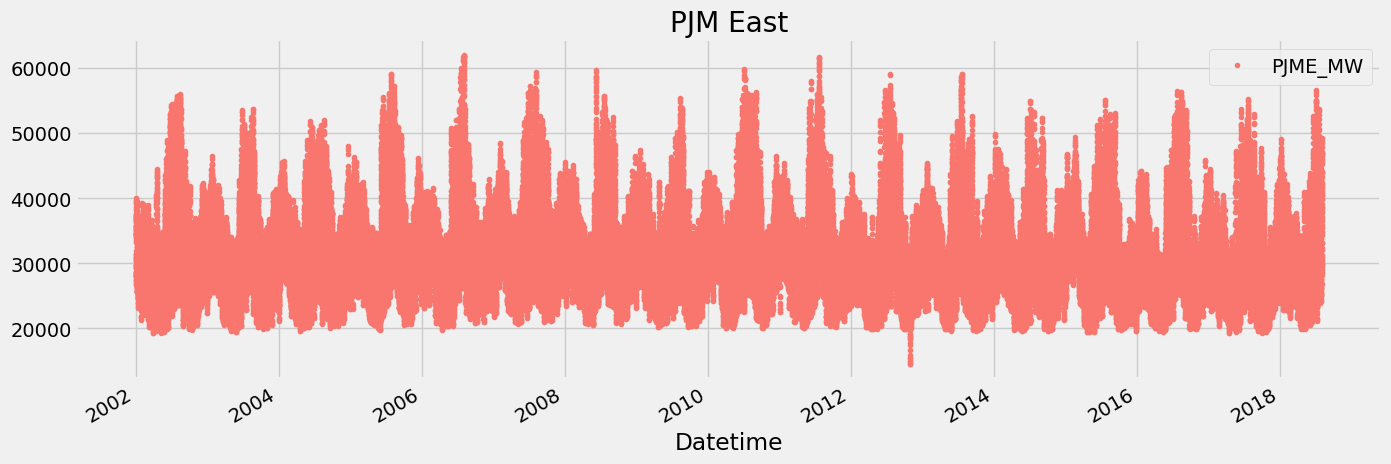

In [5]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')


